	- Loading the data...
/home/almusawiaf/MyDocuments/PhD_Projects/PSG_SURVIVAL_ANALYSIS/Data/100_Diagnoses/sample/5000/HGNN_data


X before NaN check: tensor([[  205.1324,   228.5898,  -238.9094,  ...,  -665.3060, -1093.4191,
          -458.6095],
        [  225.8953,   206.0058,  -258.7333,  ...,  -711.5159, -1116.7020,
          -434.9601],
        [  332.5744,   125.9086,  -323.4282,  ...,  -888.8340, -1230.9594,
          -422.6898],
        ...,
        [  199.0053,   282.0287,  -258.3085,  ...,  -706.7635, -1198.6426,
          -512.1521],
        [  180.7223,   267.1816,  -238.2881,  ...,  -649.8585, -1110.4419,
          -478.1737],
        [  286.8275,   350.4161,  -371.4984,  ..., -1009.4129, -1663.6217,
          -694.3062]], requires_grad=True)
Y before NaN check: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Edge weights before NaN check: tensor([nan, nan, nan,  ..., nan, nan, nan], grad_fn=<Index

	- Generating the train, test, and validation sets...
	- Preparing the model...
	- Training...


Test Precision: 
{'accuracy': 0.0, 'micro_precision': np.float64(0.06498123285693662), 'macro_precision': np.float64(0.0610074462945069), 'recall': np.float64(0.44250218680345377), 'f1_score': np.float64(0.07473914261097293), 'auc': np.float64(0.5246847174506715)}
	- Extracting and saving embeddings...


              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        92
     Class 1       0.02      0.03      0.03        72
     Class 2       0.02      0.02      0.02        43
     Class 3       0.00      0.00      0.00        30
     Class 4       0.02      0.57      0.05        23
     Class 5       0.03      0.97      0.05        35
     Class 6       0.07      1.00      0.14        96
     Class 7       0.19      0.53      0.27       258
     Class 8       0.67      0.01      0.01       290
     Class 9       0.00      0.00      0.00        46
    Class 10       0.02      1.00      0.04        24
    Class 11       0.14      0.34      0.20       242
    Class 12       0.07      0.75      0.13        55
    Class 13       0.00      0.00      0.00        29
    Class 14       0.23      0.12      0.15       232
    Class 15       0.00      0.00      0.00        34
    Class 16       0.00      0.00      0.00        64
    Class 17       0.00    

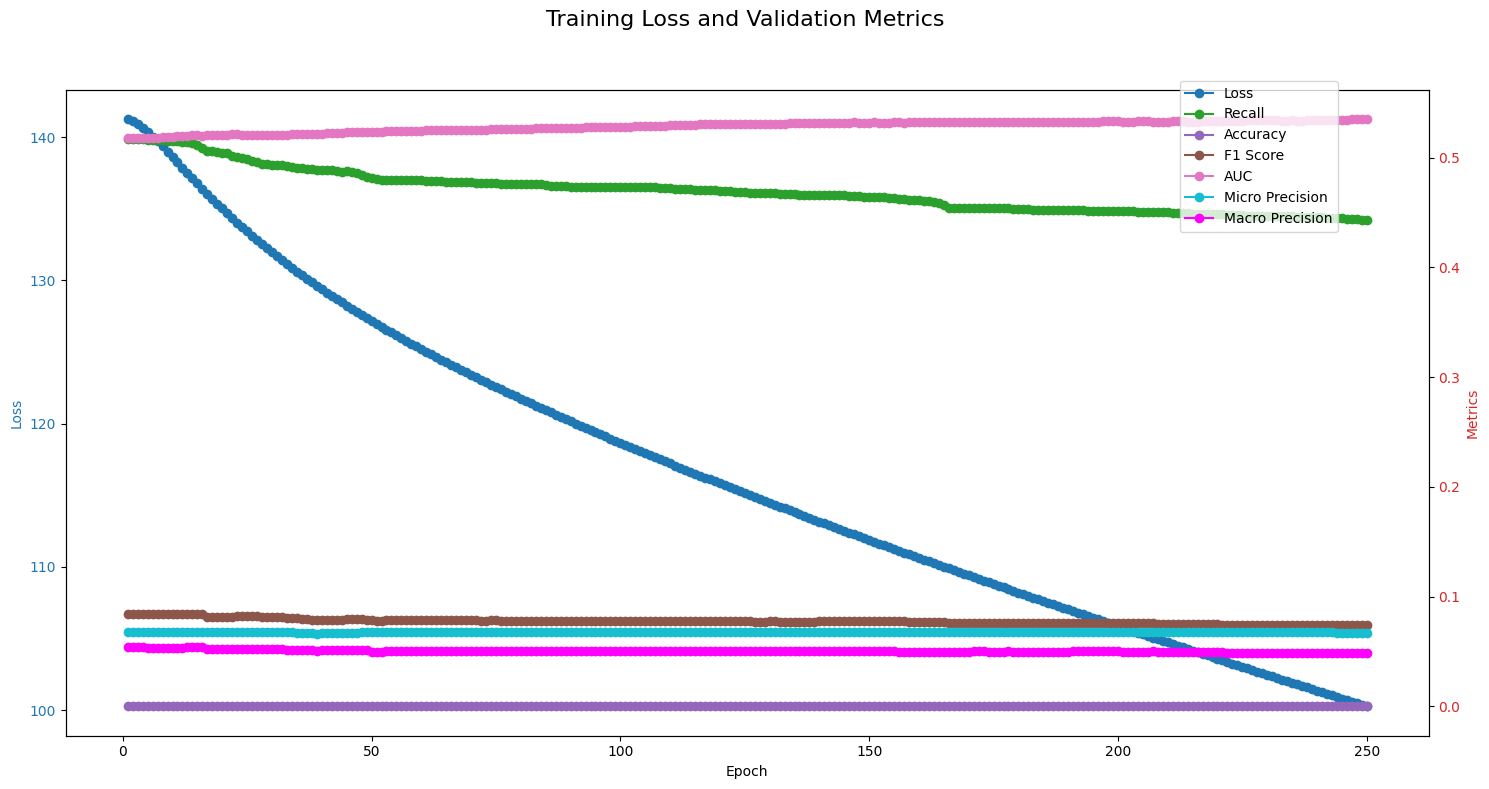

In [1]:
import sys, os

sys.path.append('/home/almusawiaf/MyDocuments/PhD_Projects/PSG_SURVIVAL_ANALYSIS/HGNN/src2/GNN_model')
from GNN_functions_patients_only import *

if __name__ == "__main__":
    disease_name = 'sample/5000'
    num_Labels = 100
    saving_path = f'/home/almusawiaf/MyDocuments/PhD_Projects/PSG_SURVIVAL_ANALYSIS/Data/{num_Labels}_Diagnoses/{disease_name}/HGNN_data'

    GNN_model = OneLayerGCN
    num_epochs = 250
    num_Meta_Path = 12
    with_SNF = False
    super_class = ''
    # super_class = '_sc'
    
    exp_name = f'{num_epochs}_epochs_SNF{super_class}'

    losses, val_metrics = main(saving_path, 
                               GNN_Model=GNN_model, 
                               num_epochs = num_epochs,
                               with_SNF = with_SNF,
                               exp_name = exp_name,
                               super_class = super_class, 
                               num_Meta_Path = num_Meta_Path)

    plot_combined_metrics_and_loss(losses, val_metrics)

    if with_SNF:
        save_results(losses, val_metrics, f'{saving_path}/performance_SAGE_{num_epochs}_eps_SNF')
    else:
        save_results(losses, val_metrics, f'{saving_path}/performance_SAGE_{num_epochs}_eps')
